## Data Analytics Project - US STATE CRIME (1960-2019)

Autors: Agnieszka Welian, Katarzyna Wątorska
Date: 14-06-2022

# 1. Description of the data

From the Unified Crime Reporting Statistics and under the collaboration of the U.S. Department of Justice and the Federal Bureau of Investigation information crime statistics are available for public review. The following data set has information on the crime rates and totals for states across the United States for a wide range of years. The crime reports are divided into two main categories: property and violent crime. Property crime refers to burglary, larceny, and motor related crime while violent crime refers to assault, murder, rape, and robbery. These reports go from 1960 to 2019.

The main goal of this project will be to take into consideration values from 1960 to 2018 and predict value of specific crime rare for 2019 for selected state.

Source: https://think.cs.vt.edu/corgis/csv/state_crime/ (which logged data from FBI page)

In [34]:
import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from cmdstanpy import CmdStanModel
import warnings

In [35]:
df = pd.read_csv("state_crime.csv")
df.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


In [36]:
df.columns

Index(['State', 'Year', 'Data.Population', 'Data.Rates.Property.All',
       'Data.Rates.Property.Burglary', 'Data.Rates.Property.Larceny',
       'Data.Rates.Property.Motor', 'Data.Rates.Violent.All',
       'Data.Rates.Violent.Assault', 'Data.Rates.Violent.Murder',
       'Data.Rates.Violent.Rape', 'Data.Rates.Violent.Robbery',
       'Data.Totals.Property.All', 'Data.Totals.Property.Burglary',
       'Data.Totals.Property.Larceny', 'Data.Totals.Property.Motor',
       'Data.Totals.Violent.All', 'Data.Totals.Violent.Assault',
       'Data.Totals.Violent.Murder', 'Data.Totals.Violent.Rape',
       'Data.Totals.Violent.Robbery'],
      dtype='object')

In [37]:
cal = df[df['State'] == "California"]
cal.tail()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
295,California,2015,39144818,253.8,2618.3,504.3,1677.1,426.3,135.0,4.8,...,24.0,99349,1024914,197404,656517,166883,52862,1861,12811,9387
296,California,2016,39250017,2553.0,479.8,1623.0,450.3,445.3,265.9,4.9,...,139.6,1002070,188304,637010,176756,174796,104375,1930,13702,54789
297,California,2017,39536653,2496.7,446.9,1623.9,425.9,449.3,264.2,4.6,...,143.2,987114,176690,642033,168391,177627,104454,1830,14721,56622
298,California,2018,39557045,2380.4,416.2,1571.8,392.4,447.4,266.5,4.4,...,137.3,941618,164632,621775,155211,176982,105412,1739,15505,54326
299,California,2019,39512223,2331.2,386.1,1586.3,358.8,441.2,267.1,4.3,...,132.4,921114,152555,626802,141757,174331,105541,1690,14799,52301


c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Data.Population'>

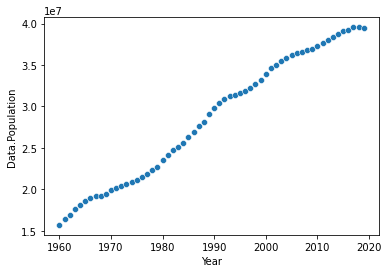

In [38]:
sns.scatterplot(cal['Year'], cal['Data.Population'])

c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Data.Rates.Violent.All'>

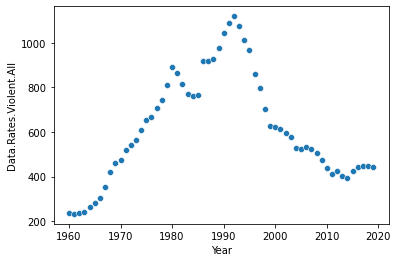

In [39]:
sns.scatterplot(cal['Year'], cal['Data.Rates.Violent.All'])
# sns.scatterplot(cal['Year'], cal['Data.Rates.Violent.Murder'])

c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Agnieszka\anaconda3\envs\data-anatylics\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Data.Totals.Violent.Robbery'>

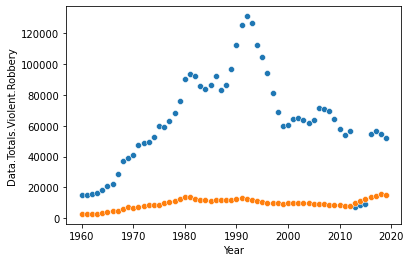

In [40]:
sns.scatterplot(cal['Year'], cal['Data.Totals.Violent.Robbery'])
sns.scatterplot(cal['Year'], cal['Data.Totals.Violent.Rape'])


In [41]:
np.mean(cal['Data.Totals.Violent.Rape'])

9654.166666666666

In [42]:
xpred = 2020
model = CmdStanModel(stan_file='gaussian_model.stan')
stan_data = {
    'N': len(cal),
    'x': cal['Year'],
    'y': cal['Data.Totals.Violent.Rape'],
    'xpred': xpred,
    'prior_mualpha': 402, # centered offset
    'prior_sigmaalpha': 10,
    # slope - 
    'prior_mubeta': 0, # both rise and fall are equally likely
    'prior_sigmabeta': 10,
    'prior_ssigma': 0.2

}
sample1 = model.sample(stan_data, iter_sampling=1000, iter_warmup=1,  chains =1, seed = 123456789)

print(sample1.stan_variable('ypred'))

#niepewnośc opisana rozkładem Gaussa

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.



[3130.53 3150.28 3155.93 3137.07 3148.63 3098.23 3109.26 3155.65 3149.09
 3100.5  3119.86 3134.21 3145.21 3127.69 3162.6  3130.51 3138.31 3159.56
 3133.86 3167.64 3135.54 3140.73 3143.59 3147.94 3126.2  3117.85 3146.47
 3157.97 3094.5  3134.69 3181.6  3158.36 3138.03 3132.66 3156.41 3129.4
 3138.82 3148.32 3124.36 3115.46 3150.66 3122.27 3133.88 3127.39 3150.73
 3148.11 3119.58 3143.85 3124.62 3155.3  3148.47 3141.21 3107.31 3153.44
 3189.2  3143.05 3141.37 3129.47 3132.79 3128.99 3142.12 3178.27 3133.5
 3158.92 3133.95 3129.13 3116.22 3125.88 3130.04 3127.6  3139.81 3163.38
 3139.45 3126.34 3140.03 3138.28 3132.33 3134.77 3118.53 3137.31 3131.11
 3149.13 3107.64 3095.55 3130.83 3150.84 3149.02 3138.29 3128.5  3132.22
 3142.87 3081.71 3159.68 3170.03 3135.55 3128.23 3153.77 3130.52 3138.01
 3178.7  3133.47 3108.03 3117.5  3138.28 3116.1  3136.82 3158.65 3137.75
 3143.   3129.9  3159.59 3148.41 3135.68 3142.18 3126.38 3152.62 3139.31
 3127.86 3131.25 3140.61 3137.33 3131.05 3122.33 313

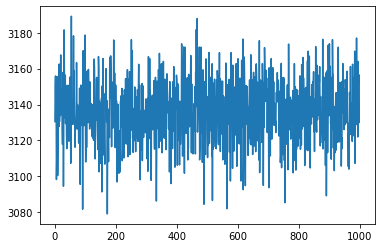

In [43]:
plt.plot(sample1.stan_variable('ypred'))
plt.show()

In [44]:
student_model = CmdStanModel(stan_file='student_t_model.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
